In [ ]:
#importing the libraries
import pandas as pd
import numpy as np

In [ ]:
#loading the dataset/csv files
dataset = pd.read_csv('/content/drive/MyDrive/CO2_emission_project/energy.csv',encoding='latin')

In [ ]:
dataset.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,World,all_energy_types,1980,292.899790,296.337228,27770.91028,4298126.522,68.145921,10.547,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.91028,4298126.522,68.145921,10.547,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.91028,4298126.522,68.145921,10.547,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.91028,4298126.522,68.145921,10.547,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.91028,4298126.522,68.145921,10.547,0.000000


In [ ]:
dataset.shape

(55440, 10)

In [ ]:
#checking the datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      55440 non-null  object 
 1   Energy_type                  55440 non-null  object 
 2   Year                         55440 non-null  int64  
 3   Energy_consumption           44287 non-null  float64
 4   Energy_production            44289 non-null  float64
 5   GDP                          40026 non-null  float64
 6   Population                   46014 non-null  float64
 7   Energy_intensity_per_capita  50358 non-null  float64
 8   Energy_intensity_by_GDP      50358 non-null  float64
 9   CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
#missing values in dataset
dataset.isnull().sum()

Country                            0
Energy_type                        0
Year                               0
Energy_consumption             11153
Energy_production              11151
GDP                            15414
Population                      9426
Energy_intensity_per_capita     5082
Energy_intensity_by_GDP         5082
CO2_emission                    3826
dtype: int64

In [ ]:
dataset.isnull().mean()*100
#missing values in percentage

Country                         0.000000
Energy_type                     0.000000
Year                            0.000000
Energy_consumption             20.117244
Energy_production              20.113636
GDP                            27.803030
Population                     17.002165
Energy_intensity_per_capita     9.166667
Energy_intensity_by_GDP         9.166667
CO2_emission                    6.901154
dtype: float64

In [ ]:
X = dataset.drop(columns=['CO2_emission'],axis=1)
Y = dataset['CO2_emission']

In [ ]:
#First we split the dataset into train,test than we do the data preprocessing to avoid the situation of data leakage
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)
X_train.shape,X_test.shape,Y_train.shape

((44352, 9), (11088, 9), (44352,))

In [ ]:
#Data preprocessing for training data
#1) Handling the missing values
X_train.isnull().mean()*100

Country                         0.000000
Energy_type                     0.000000
Year                            0.000000
Energy_consumption             20.165945
Energy_production              20.163690
GDP                            27.910804
Population                     17.092803
Energy_intensity_per_capita     9.212662
Energy_intensity_by_GDP         9.212662
dtype: float64

In [ ]:
#Energy_consumption column
#first we see the kind plot
from matplotlib import pyplot as plt
import seaborn as sns

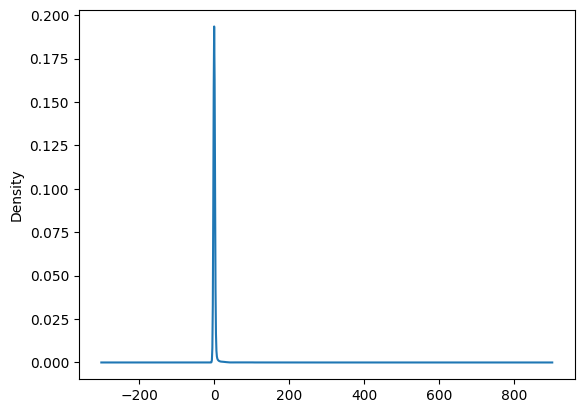

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Energy_consumption'].plot(kind='kde',ax=ax)
plt.show()

In [ ]:
#we handling the missing values of Energy_consumption column using median
missing_1 = X_train['Energy_consumption'].fillna(X_train['Energy_consumption'].median(),inplace=True)


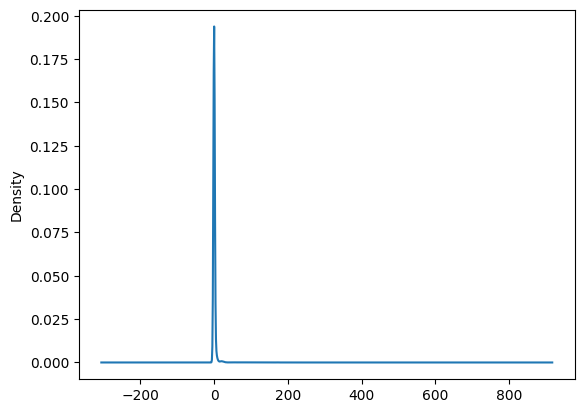

In [ ]:
#Energy production column
fig = plt.figure()
bx = fig.add_subplot(111)
X_train['Energy_production'].plot(kind='kde',ax=bx)
plt.show()

In [ ]:
#we handling the missing values using median
missing_2 = X_train['Energy_production'].fillna(X_train['Energy_production'].median(),inplace=True)

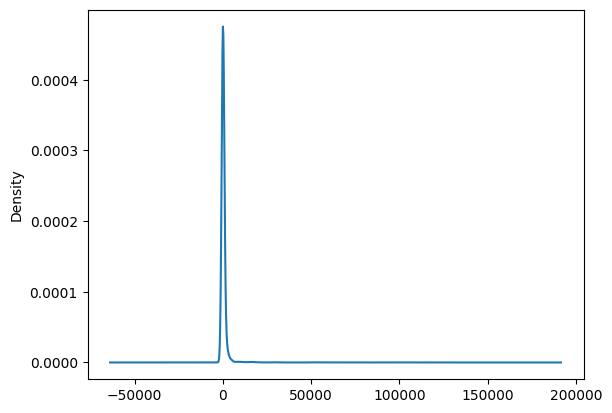

In [ ]:
#GDP column
fig = plt.figure()
cx = fig.add_subplot(111)
X_train['GDP'].plot(kind='kde',ax=cx)
plt.show()

In [ ]:
#we handling the missing values using median
missing_3 = X_train['GDP'].fillna(X_train['GDP'].median(),inplace=True)

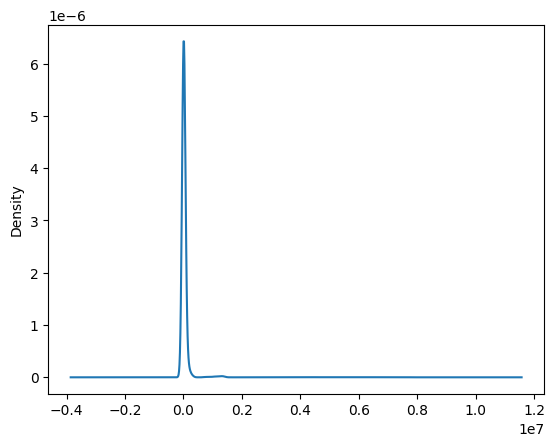

In [ ]:
#Population column
fig = plt.figure()
dx = fig.add_subplot()
X_train['Population'].plot(kind='kde',ax=dx)
plt.show()



In [ ]:
#we handling the missing values using median
missing_4 = X_train['Population'].fillna(X_train['Population'].median(),inplace=True)

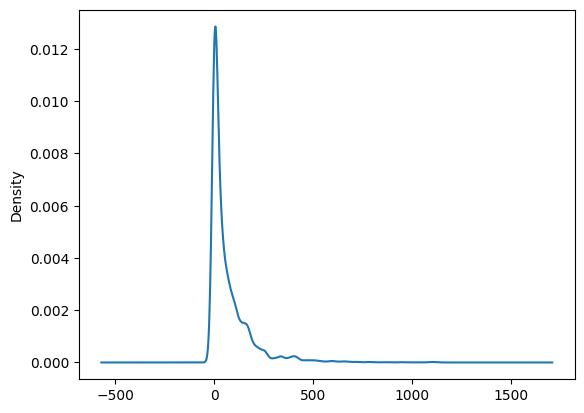

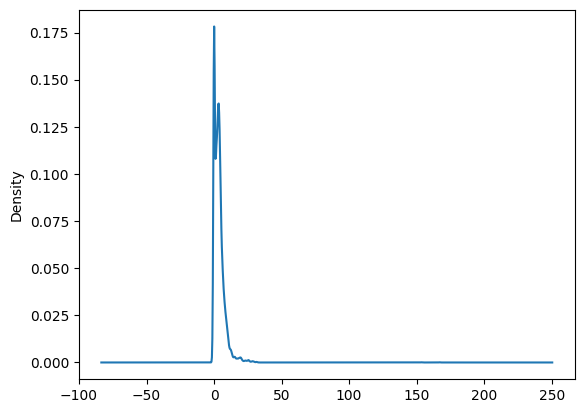

In [ ]:
#Energy intensity per capita and Energy intensity by GDP
fig = plt.figure()
ex = fig.add_subplot(111)
X_train['Energy_intensity_per_capita'].plot(kind='kde',ax=ex)
plt.show()

fig = plt.figure()
fx = fig.add_subplot(111)
X_train['Energy_intensity_by_GDP'].plot(kind='kde',ax=fx)
plt.show()

In [ ]:
#we handling the missing values using median
missing_5 = X_train['Energy_intensity_per_capita'].fillna(X_train['Energy_intensity_per_capita'].median(),inplace=True)

In [ ]:
#we handling the missing values using median
missing_6 = X_train['Energy_intensity_by_GDP'].fillna(X_train['Energy_intensity_by_GDP'].median(),inplace=True)

In [ ]:
X_train.isnull().sum()

Country                        0
Energy_type                    0
Year                           0
Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
dtype: int64

In [ ]:
#handling the missing values of test data
X_test.isnull().mean()*100

Country                         0.000000
Energy_type                     0.000000
Year                            0.000000
Energy_consumption             19.922439
Energy_production              19.913420
GDP                            27.371934
Population                     16.639610
Energy_intensity_per_capita     8.982684
Energy_intensity_by_GDP         8.982684
dtype: float64

In [ ]:
#we handling the missing values using median
missing_7 = X_test['Energy_consumption'].fillna(X_test['Energy_consumption'].median(),inplace=True)

In [ ]:
#we handling the missing values using median
missing_8 = X_test['Energy_production'].fillna(X_test['Energy_production'].median(),inplace=True)

In [ ]:
#we handling the missing values using median
missing_9 = X_test['GDP'].fillna(X_test['GDP'].median(),inplace=True)

In [ ]:
#we handling the missing values using median
missing_10 = X_test['Population'].fillna(X_test['Population'].median(),inplace=True)

In [ ]:
#we handling the missing values using median
missing_11 = X_test['Energy_intensity_per_capita'].fillna(X_test['Energy_intensity_per_capita'].median(),inplace=True)

In [ ]:
#we handling the missing values using median
missing_12 = X_test['Energy_intensity_by_GDP'].fillna(X_test['Energy_intensity_by_GDP'].median(),inplace=True)

In [ ]:
X_test.isnull().sum()

Country                        0
Energy_type                    0
Year                           0
Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
dtype: int64

In [ ]:
#Handling the categorical clolumn
X_train['Country'].value_counts()

Turks and Caicos Islands    211
South Sudan                 206
Samoa                       206
Algeria                     205
Greenland                   205
                           ... 
Guam                        181
Sudan                       180
U.S. Virgin Islands         180
Dominica                    180
Cabo Verde                  178
Name: Country, Length: 231, dtype: int64

In [ ]:
X_train['Energy_type'].value_counts()

petroleum_n_other_liquids    7456
coal                         7406
nuclear                      7400
natural_gas                  7377
all_energy_types             7375
renewables_n_other           7338
Name: Energy_type, dtype: int64

In [ ]:
#Handle the Energy_type column using label encoding
label_1 = X_train.replace({'Energy_type':{'petroleum_n_other_liquids':0,'coal':1,'nuclear':2,'natural_gas':3,'all_energy_types':4,
                                          'renewables_n_other':5}},inplace=True)

In [ ]:
X_train['Energy_type'].value_counts()

0    7456
1    7406
2    7400
3    7377
4    7375
5    7338
Name: Energy_type, dtype: int64

In [ ]:
#Handling the country column using label encoder
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()
X_train['Country'] = encoding.fit_transform(X_train['Country'])

In [ ]:
X_train['Country'].value_counts()

210    211
190    206
176    206
2      205
84     205
      ... 
87     181
193    180
214    180
54     180
32     178
Name: Country, Length: 231, dtype: int64

In [ ]:
#Handling the categorical columns of test data
X_test['Energy_type'].value_counts()

renewables_n_other           1902
all_energy_types             1865
natural_gas                  1863
nuclear                      1840
coal                         1834
petroleum_n_other_liquids    1784
Name: Energy_type, dtype: int64

In [ ]:
#Handling the country column using label encoder
from sklearn.preprocessing import LabelEncoder
encoding_1 = LabelEncoder()
X_test['Country'] = encoding_1.fit_transform(X_test['Country'])

In [ ]:
#Handle the Energy_type column using label encoding
label_1 = X_test.replace({'Energy_type':{'petroleum_n_other_liquids':0,'coal':1,'nuclear':2,'natural_gas':3,'all_energy_types':4,
                                          'renewables_n_other':5}},inplace=True)

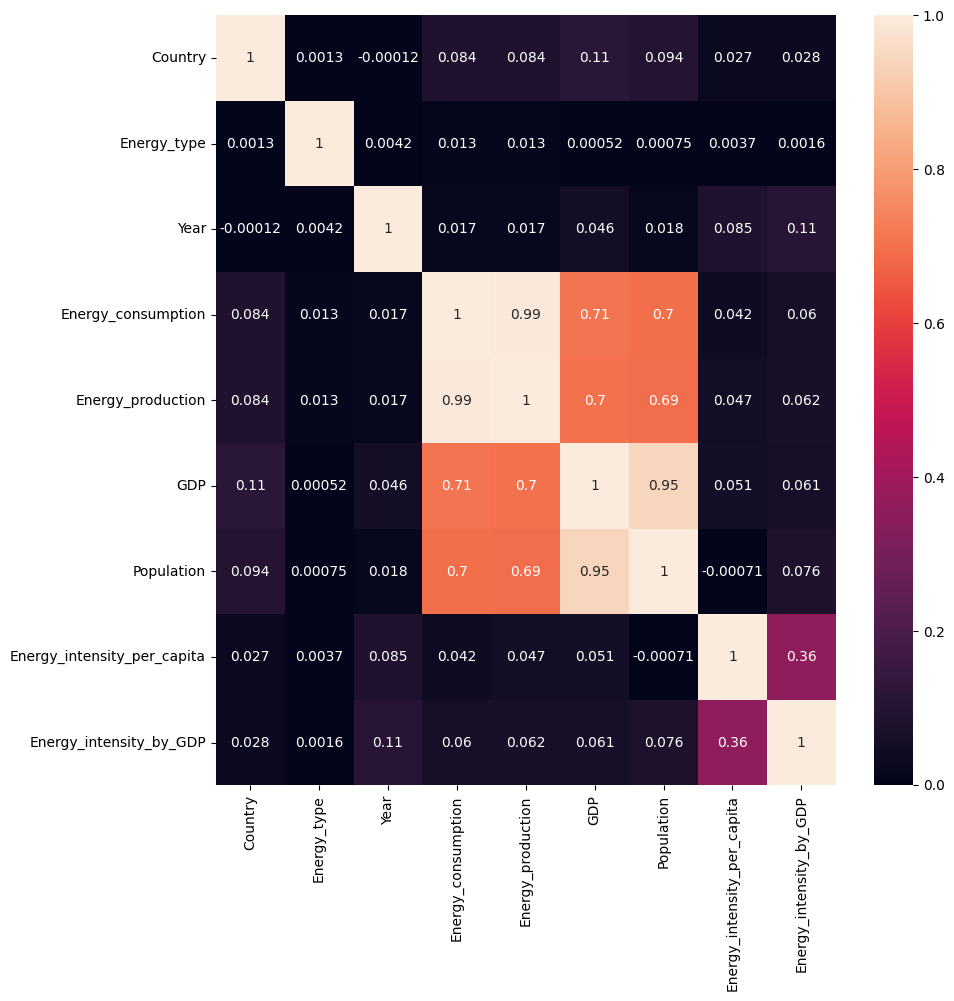

In [ ]:
#analysis
#correlation
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True)
plt.show()

1)Energy consumption and energy production correlated by 99% so we can use either consumption or production**.

2)GDP and population column correlated by 95% so we can use either GDP or Population.
   This is done to avoid multicollinearity issue.


In [ ]:
X_train = X_train.drop(columns=['Energy_consumption','Population'],axis=1)


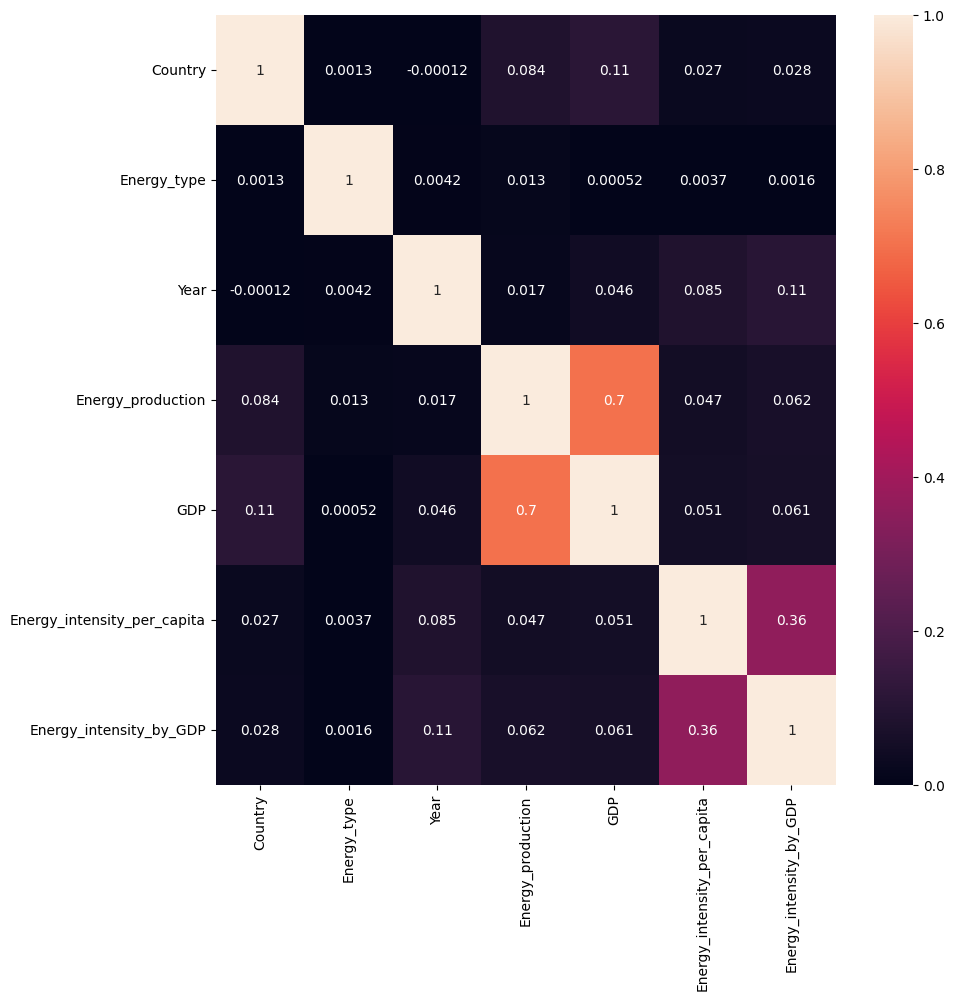

In [ ]:
#analysis
#correlation
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [ ]:
#similar for test data
X_test = X_test.drop(columns=['Energy_consumption','Population'],axis=1)


In [ ]:
X_train.shape,X_test.shape

((44352, 7), (11088, 7))

In [ ]:
#handling the missing values of target column
missing_13 = Y_train.fillna(Y_train.median(),inplace=True)

In [ ]:
#handling the missing values of target column
missing_14 = Y_test.fillna(Y_test.median(),inplace=True)

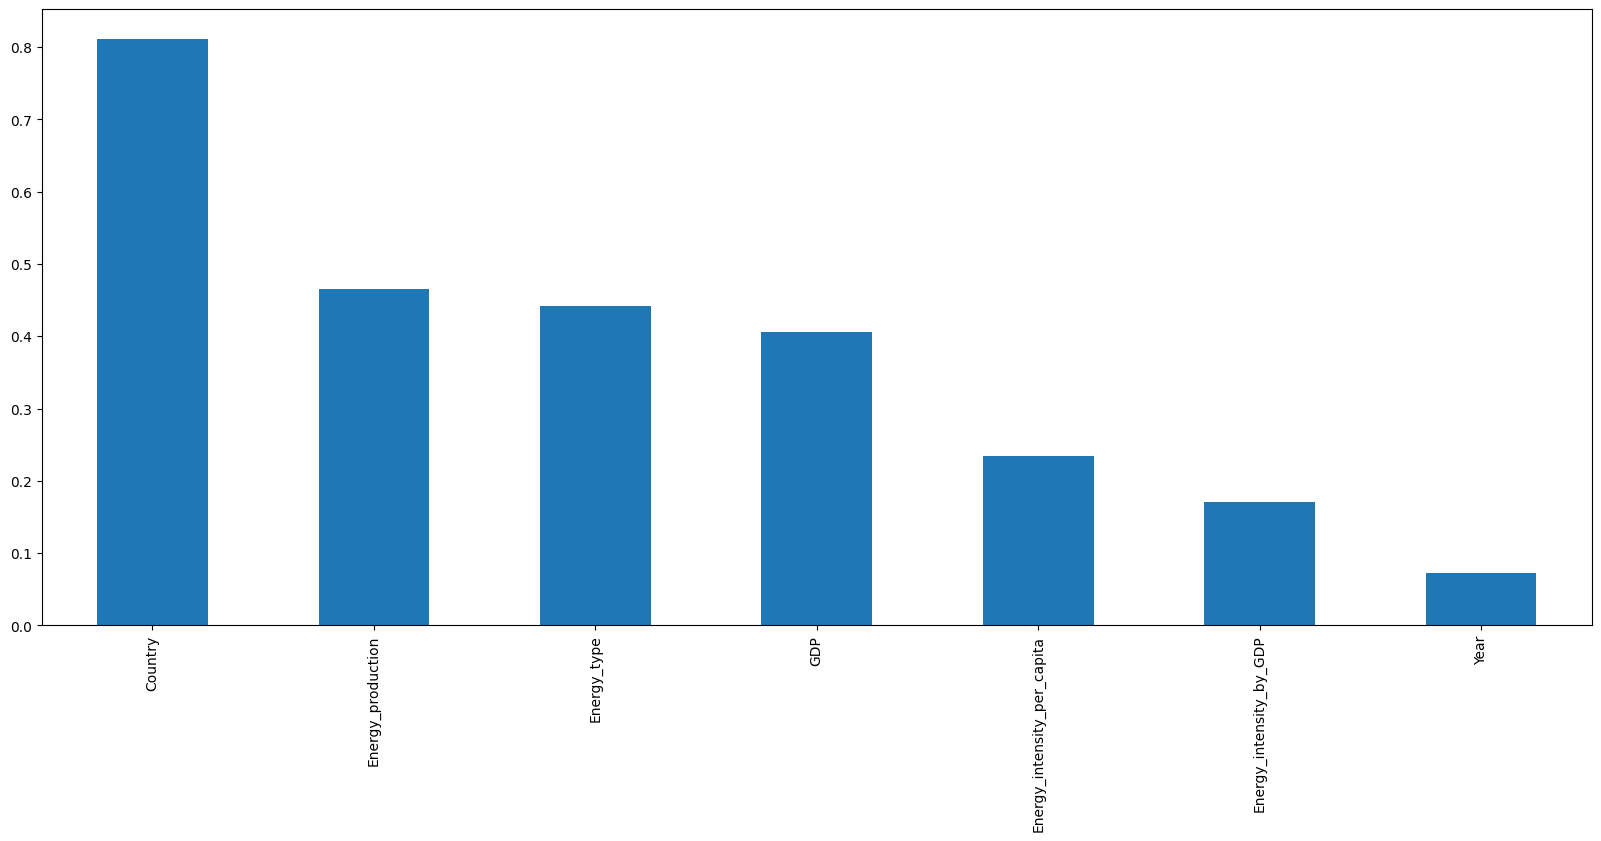

In [ ]:

#plotting the complex relation between column and target variable
from sklearn.feature_selection import mutual_info_regression
info_1 = mutual_info_regression(X_train,Y_train)
selection_1 = pd.Series(info_1)
selection_1.index=X_train.columns
selection_1.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.show()

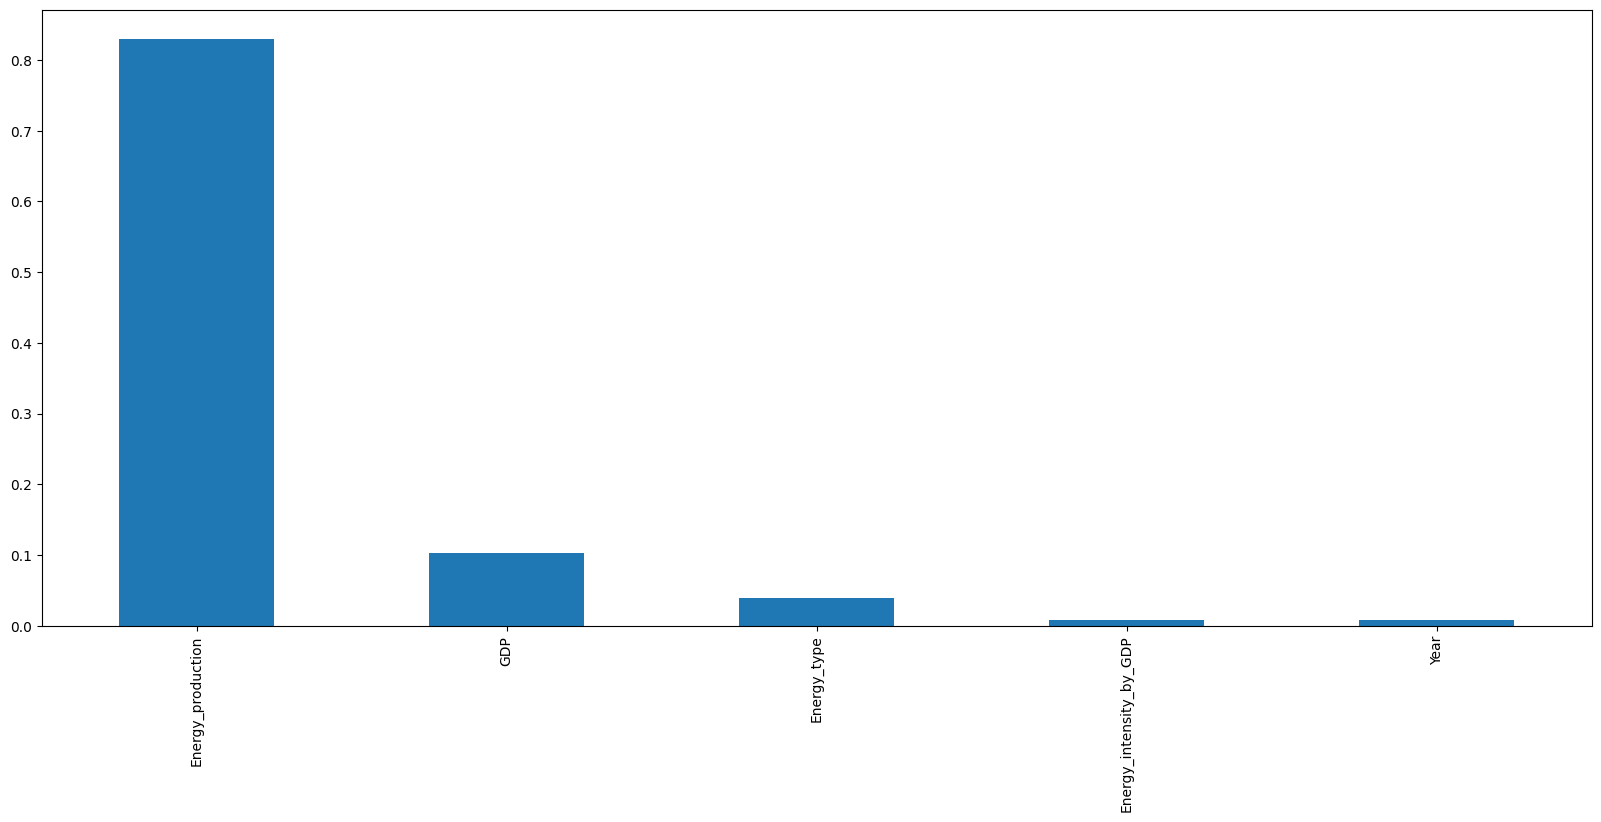

In [ ]:
#important feature using extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor
reg_1 = ExtraTreesRegressor()
reg_1.fit(X_train,Y_train)
feat_imp = pd.Series(reg_1.feature_importances_,index=X_train.columns)
feat_imp.nlargest(5).plot.bar(figsize=(20,8))
plt.show()

In [ ]:
#model selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [ ]:
#for training data
models = [LinearRegression(),RandomForestRegressor(),Lasso(),XGBRegressor()]
for model in models:
  model.fit(X_train,Y_train)
  X_train_prediction = model.predict(X_train)
  from sklearn import metrics
  R2_score = metrics.r2_score(Y_train,X_train_prediction)
  mean_error = metrics.mean_absolute_error(Y_train,X_train_prediction)
  print('r2_score of the:',model,'=',R2_score)
  print('mean_absolute_error of the:',model,'=',mean_error)

r2_score of the: LinearRegression() = 0.9521505703888202
mean_absolute_error of the: LinearRegression() = 39.355189351890374
r2_score of the: RandomForestRegressor() = 0.9986219392536786
mean_absolute_error of the: RandomForestRegressor() = 1.9143339445279344
r2_score of the: Lasso() = 0.9521500056767348
mean_absolute_error of the: Lasso() = 39.006238444439745
r2_score of the: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,


In [ ]:
for model in models:
  X_test_prediction = model.predict(X_test)
  from sklearn import metrics
  R2_score_1 = metrics.r2_score(Y_test,X_test_prediction)
  mean_error_1 = metrics.mean_absolute_error(Y_test,X_test_prediction)
  print('r2_score of the:',model,'=',R2_score_1)
  print('mean_absolute_error of the:',model,'=',mean_error_1)

r2_score of the: LinearRegression() = 0.9449209124810016
mean_absolute_error of the: LinearRegression() = 41.45342789157616
r2_score of the: RandomForestRegressor() = 0.9936220215262762
mean_absolute_error of the: RandomForestRegressor() = 5.131692783012205
r2_score of the: Lasso() = 0.9449141587243844
mean_absolute_error of the: Lasso() = 41.10409946698453
r2_score of the: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
   

In [ ]:
Y_test[:5]

37858    0.000000
54945    5.027809
9474     4.700000
18598    0.000000
48390    0.192311
Name: CO2_emission, dtype: float64

In [ ]:
#let predict using random forest
reg_2 = RandomForestRegressor(random_state=50)
reg_2.fit(X_train,Y_train)
prediction_1 = reg_2.predict(X_test)
prediction_1[:5]

array([0.1158371 , 5.07651674, 4.46304186, 0.64207075, 0.19335555])

In [ ]:
#let predict using linear regression
reg_3 = LinearRegression()
reg_3.fit(X_train,Y_train)
prediction_2 = reg_3.predict(X_test)
prediction_2[:5]

array([ 6.48279322, 19.05022623, -8.82957354, -2.3835935 , -7.23896029])

In [ ]:
#let predict using lasso regression
reg_4 = Lasso()
reg_4.fit(X_train,Y_train)
prediction_3 = reg_4.predict(X_test)
prediction_3[:5]

array([ 6.22181136, 18.00090596, -8.34027684, -2.53080572, -7.01937668])

In [ ]:
#let predict using XGB regression
reg_5 = XGBRegressor()
reg_5.fit(X_train,Y_train)
prediction_4 = reg_5.predict(X_test)
prediction_4[:5]

array([-1.4859636 ,  2.193678  ,  3.6640127 ,  1.2242384 ,  0.24407372],
      dtype=float32)

#)Random forest giving the good results for the prediction.

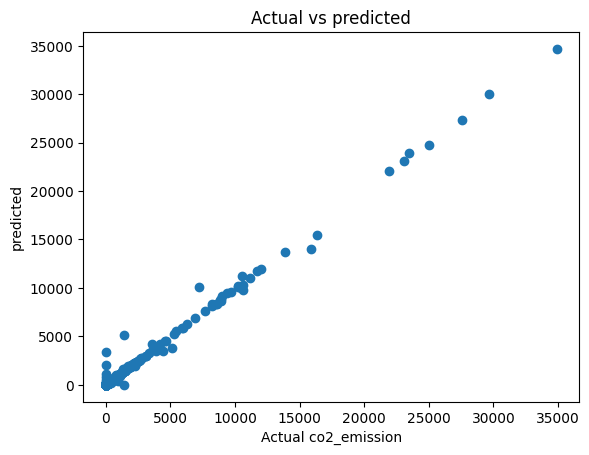

In [ ]:
#plotting
plt.scatter(Y_test,prediction_1)
plt.xlabel('Actual co2_emission')
plt.ylabel('predicted')
plt.title('Actual vs predicted')
plt.show()

In [ ]:
import pickle
import os
drive_path = '/content/drive/MyDrive/CO2_emission_project'
os.chdir(drive_path)
with open('model.pickle','wb') as model_file:
  pickle.dump(reg_2,model_file)